
### deep learning automate the processs of ridge and lasso in neurone with dead neurons kind of things and handling categorical values at one neuron.....most of the ml hyperparameter tuning is done by neurones like one step one step by one neurones

Yes, that's a great way to conceptualize how deep learning works! In deep learning models, especially in neural networks, different neurons and layers can learn various types of representations and regularization techniques simultaneously.

In a neural network, each neuron specializes in detecting specific features of the input data by applying its own weights to the inputs received from the previous layer. During training, only the weights of neurons that significantly contribute to the prediction error are updated, allowing for selective learning. Neurons use activation functions to introduce non-linearity, determining whether to activate based on the weighted sum of inputs and bias. Early layers capture basic patterns, while deeper layers combine these patterns to recognize more complex structures, enhancing the model's generalization capabilities. This architecture enables deep learning models to effectively process and understand complex data.

# What is Deep Learning


ML: automation of statistics and Often requires manual feature engineering.ml works good with small data 
DL: automation of ml like Automatically learns features from raw data.dl works good with big data

DL architecture does require more data to leverage its full potential and avoid overfitting. ML models, being simpler, can often extract meaningful patterns from smaller datasets.
Parameter count:
DL models often have millions or billions of parameters, while traditional ML models might have hundreds or thousands.

## McCulloch and Pitts Neuron

In 1943, McCulloch and Pitts introduced a mathematical model of a neuron. It consisted of three components:

1. A set of **weights** $w_i$ corresponding to synapses (inputs)
2. An **adder** for summing input signals; analogous to cell membrane that collects charge
3. An **activation function** for determining when the neuron fires, based on accumulated input

The neuron model is shown schematically below. On the left are input nodes $\{x_i\}$, usually expressed as a vector. The strength with which the inputs are able to deliver the signal along the synapse is determined by their corresponding weights $\{w_i\}$. The adder then sums the inputs from all the synapses:

$$h = \sum_i w_i x_i$$

The parameter $\theta$ determines whether or not the neuron fires given a weighted input of $h$. If it fires, it returns a value $y=1$, otherwise $y=0$. For example, a simple **activation function** is using $\theta$ as a simple fixed threshold:

$$y = g(h) = \left\{ \begin{array}{l}
1, \text{if } h \gt \theta \\
0, \text{if } h \le \theta
\end{array} \right.$$

this activation function may take any of several forms, such as a logistic function.

![neuron](http://d.pr/i/9AMK+)

A single neuron is not interesting, nor useful, from a learning perspective. It cannot learn; it simply receives inputs and either fires or not. Only when neurons are joined as a **network** can they perform useful work.

Learning takes place by changing the weights of the connections in a neural network, and by changing the parameters of the activation functions of neurons.

## Perceptron

A collection of McCullough and Pitts neurons, along with a set of input nodes connected to the inputs via weighted edges, is a perceptron, the simplest neural network.

Each neuron is independent of the others in the perceptron, in the sense that its behavior and performance depends only on its own weights and threshold values, and not of those for the other neurons. Though they share inputs, they operate independently.

The number of inputs and outputs are determined by the data. Weights are stored as a `N x K` matrix, with N observations and K neurons, with $w_{ij}$ specifying the weight on the *i*th observation on the *j*th neuron.

![perceptron](http://d.pr/i/4IWA+)

In order to use the perceptron for statistical learning, we compare the outputs $y_j$ from each neuron to the obervation target $t_j$, and adjust the input weights when they do not correspond (*e.g.* if a neuron fires when it should not have).

$$t_j - y_j$$

We use this difference to update the weight $w_{ij}$, based on the input and a desired **learning rate**. This results in an update rule:

$$w_{ij} \leftarrow w_{ij} + \eta (t_j - y_j) x_i$$

After an incremental improvement, the perceptron is shown the training data again, resulting in another update. This is repeated until the performance no longer improves. Having a learning rate less than one results in a more stable learning rate, though this stability is traded off against having to expose the network to the data multiple times. Typical learning rates are in the 0.1-0.4 range.

An additional input node is typically added to the perceptron model, which is a constant value (usually -1, 0, or 1) that acts analogously to an intercept in a regression model. This establishes a baseline input for the case when all inputs are zero.

![bias](http://d.pr/i/105b5+)

## Learning with Perceptrons

1. Initialize weights $w_{ij}$ to small, random numbers.
2. For each t in T iterations
    * compute activation for each neuron *j* connected to each input vector *i*
    * update weights
    $$w_{ij} \leftarrow w_{ij} + \eta (t_j - y_j) x_i$$


This algorithm is $\mathcal{O}(Tmn)$

### Example: Logical functions

Let's see how the perceptron learns by training it on a couple of of logical functions, AND and OR. For two variables `x1` and `x2`, the AND function returns 1 if both are true, or zero otherwise; the OR function returns 1 if either variable is true, or both. These functions can be expressed as simple lookup tables.

# Neural Network Forward and Backward Propagation

## Network Architecture
- **Input Layer (Layer 1)**: 2 neurons
- **Hidden Layer (Layer 2)**: 2 neurons
- **Output Layer (Layer 3)**: 1 neuron
- **Activation Function**: Sigmoid function $$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

## Data
| **Input** $$ (x_1, x_2) $$ | **Target Output** $$ (y) $$ |
|-----------------------------|-----------------------------|
| (0.5, 0.8)                  | 1                           |

## Initial Weights and Biases
- **Weights from Input to Hidden Layer** $$ W^1 $$:
$$
W^1 = \begin{pmatrix}
0.2 & 0.4 \\
0.3 & 0.7
\end{pmatrix}
$$
- **Biases for Hidden Layer** $$ b^1 $$:
$$
b^1 = \begin{pmatrix}
0.1 \\
0.2
\end{pmatrix}
$$
- **Weights from Hidden Layer to Output Layer** $$ W^2 $$:
$$
W^2 = \begin{pmatrix}
0.5 \\
0.6
\end{pmatrix}
$$
- **Bias for Output Layer** $$ b^2 = 0.3 $$

---

## Step 1: Forward Propagation

### 1.1. Pre-activation $$ z^2 $$ for Hidden Layer
$$
z^2 = W^1 x + b^1
$$
$$
z^2 = \begin{pmatrix} 0.2 & 0.4 \\ 0.3 & 0.7 \end{pmatrix} \begin{pmatrix} 0.5 \\ 0.8 \end{pmatrix} + \begin{pmatrix} 0.1 \\ 0.2 \end{pmatrix}
$$
$$
z^2_1 = 0.2 \cdot 0.5 + 0.4 \cdot 0.8 + 0.1 = 0.52
$$
$$
z^2_2 = 0.3 \cdot 0.5 + 0.7 \cdot 0.8 + 0.2 = 0.91
$$
$$
z^2 = \begin{pmatrix} 0.52 \\ 0.91 \end{pmatrix}
$$

### 1.2. Activation $$ a^2 $$ for Hidden Layer
$$
a^2 = \sigma(z^2) = \frac{1}{1 + e^{-z^2}}
$$
$$
a^2_1 = \frac{1}{1 + e^{-0.52}} \approx 0.627
$$
$$
a^2_2 = \frac{1}{1 + e^{-0.91}} \approx 0.713
$$
$$
a^2 = \begin{pmatrix} 0.627 \\ 0.713 \end{pmatrix}
$$

### 1.3. Pre-activation $$ z^3 $$ for Output Layer
$$
z^3 = W^2 a^2 + b^2
$$
$$
z^3 = \begin{pmatrix} 0.5 & 0.6 \end{pmatrix} \begin{pmatrix} 0.627 \\ 0.713 \end{pmatrix} + 0.3
$$
$$
z^3 = 0.5 \cdot 0.627 + 0.6 \cdot 0.713 + 0.3 = 1.0413
$$

### 1.4. Activation $$ a^3 $$ for Output Layer
$$
a^3 = \sigma(z^3) = \frac{1}{1 + e^{-1.0413}} \approx 0.739
$$
$$
\hat{y} = a^3 = 0.739
$$

---

## Step 2: Backpropagation

### 2.1. Error at Output Layer
The cost function $$ J $$ (MSE):
$$
J = \frac{1}{2} (y - \hat{y})^2
$$
$$
J = \frac{1}{2} (1 - 0.739)^2 = 0.03406
$$

Now, compute the gradient $$ \frac{\partial J}{\partial z^3} $$:
$$
\frac{\partial J}{\partial z^3} = (a^3 - y) \cdot \sigma'(z^3)
$$
$$
\sigma'(z^3) = a^3(1 - a^3)
$$
$$
\sigma'(1.0413) = 0.739 \cdot (1 - 0.739) = 0.1929
$$
$$
\frac{\partial J}{\partial z^3} = (0.739 - 1) \cdot 0.1929 = -0.0503
$$

### 2.2. Gradient for $$ W^2 $$ and $$ b^2 $$
$$
\frac{\partial J}{\partial W^2} = \frac{\partial J}{\partial z^3} \cdot (a^2)^T
$$
$$
\frac{\partial J}{\partial W^2_1} = -0.0503 \cdot 0.627 = -0.03155
$$
$$
\frac{\partial J}{\partial W^2_2} = -0.0503 \cdot 0.713 = -0.03587
$$
$$
\frac{\partial J}{\partial W^2} = \begin{pmatrix} -0.03155 \\ -0.03587 \end{pmatrix}
$$
For the bias:
$$
\frac{\partial J}{\partial b^2} = \frac{\partial J}{\partial z^3} = -0.0503
$$

### 2.3. Backpropagate to Hidden Layer
$$
\frac{\partial J}{\partial z^2} = \left( W^2 \right)^T \cdot \frac{\partial J}{\partial z^3} \cdot \sigma'(z^2)
$$
$$
\left( W^2 \right)^T = \begin{pmatrix} 0.5 \\ 0.6 \end{pmatrix}
$$
$$
\frac{\partial J}{\partial z^2} = \begin{pmatrix} 0.5 \\ 0.6 \end{pmatrix} \cdot -0.0503 = \begin{pmatrix} -0.02515 \\ -0.03018 \end{pmatrix}
$$

Now compute $$ \sigma'(z^2) $$:
$$
\sigma'(z^2_1) = 0.627 \cdot (1 - 0.627) = 0.2339
$$
$$
\sigma'(z^2_2) = 0.713 \cdot (1 - 0.713) = 0.2047
$$

Thus:
$$
\frac{\partial J}{\partial z^2_1} = -0.02515 \cdot 0.2339 = -0.00588
$$
$$
\frac{\partial J}{\partial z^2_2} = -0.03018 \cdot 0.2047 = -0.00617
$$
$$
\frac{\partial J}{\partial z^2} = \begin{pmatrix} -0.00588 \\ -0.00617 \end{pmatrix}
$$

### 2.4. Gradient for $$ W^1 $$ and $$ b^1 $$
$$
\frac{\partial J}{\partial W^1} = \frac{\partial J}{\partial z^2} \cdot (x)^T
$$
$$
\frac{\partial J}{\partial W^1_1} = -0.00588 \cdot 0.5 = -0.00294
$$
$$
\frac{\partial J}{\partial W^1_2} = -0.00617 \cdot 0.5 = -0.00308
$$
For the bias:
$$
\frac{\partial J}{\partial b^1_1} = -0.00588, \quad \frac{\partial J}{\partial b^1_2} = -0.00617
$$

---

### Summary of Gradient Updates:
- **$$ \Delta W^2 $$**: $$ \begin{pmatrix} -0.03155 \\ -0.03587 \end{pmatrix} $$
- **$$ \Delta b^2 $$**: $$ -0.0503 $$
- **$$ \Delta W^1 $$**: $$ \begin{pmatrix} -0.00294 \\ -0.00308 \end{pmatrix} $$
- **$$ \Delta b^1 $$**: $$ \begin{pmatrix} -0.00588 \\ -0.00617 \


In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import optimize
from ipywidgets import *
from IPython.display import SVG
from sklearn import datasets


In [9]:
AND = pd.DataFrame({'x1': (0,0,1,1), 'x2': (0,1,0,1), 'y': (0,0,0,1)})
AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


First, we need to initialize weights to small, random values (can be positive and negative).

In [10]:
w = np.random.randn(3)*1e-4

Then, a simple activation function for calculating $g(h)$:

In [11]:
g = lambda inputs, weights: np.where(np.dot(inputs, weights)>0, 1, 0)

Finally, a training function that iterates the learning algorithm, returning the adapted weights.

In [12]:
def train(inputs, targets, weights, eta, n_iterations):

    # Add the inputs that match the bias node
    inputs = np.c_[inputs, -np.ones((len(inputs), 1))]

    for n in range(n_iterations):

        activations = g(inputs, weights);
        weights -= eta*np.dot(np.transpose(inputs), activations - targets)
        
    return(weights)

Let's test it first on the AND function.

In [13]:
inputs = AND[['x1','x2']]
target = AND['y']

w = train(inputs, target, w, 0.25, 10)

Checking the performance:

In [14]:
g(np.c_[inputs, -np.ones((len(inputs), 1))], w)

array([0, 0, 0, 1])

Thus, it has learned the function perfectly. Now for OR:

In [15]:
OR = pd.DataFrame({'x1': (0,0,1,1), 'x2': (0,1,0,1), 'y': (0,1,1,1)})
OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [16]:
w = np.random.randn(3)*1e-4

In [17]:
inputs = OR[['x1','x2']]
target = OR['y']

w = train(inputs, target, w, 0.25, 20)

In [18]:
g(np.c_[inputs, -np.ones((len(inputs), 1))], w)

array([0, 1, 1, 1])

Also 100% correct.

### Exercise: XOR

Now try running the model on the XOR function, where a one is returned for either `x1` or `x2` being true, but *not* both. What happens here?

In [19]:
# Write your answer here

Let's explore the problem graphically:

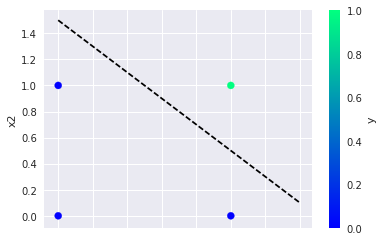

In [20]:
AND.plot(kind='scatter', x='x1', y='x2', c='y', s=50, colormap='winter')
plt.plot(np.linspace(0,1.4), 1.5 - 1*np.linspace(0,1.4), 'k--');

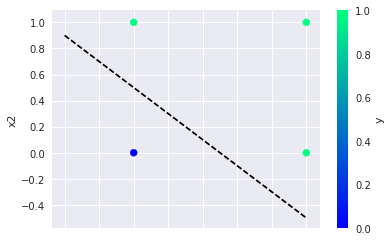

In [21]:
OR.plot(kind='scatter', x='x1', y='x2', c='y', s=50, colormap='winter')
plt.plot(np.linspace(-.4,1), .5 - 1*np.linspace(-.4,1), 'k--');

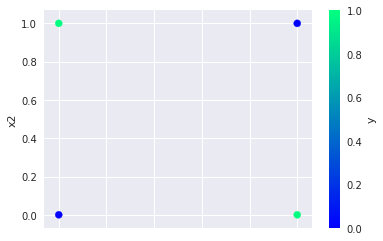

In [22]:
XOR = pd.DataFrame({'x1': (0,0,1,1), 'x2': (0,1,0,1), 'y': (0,1,1,0)})

XOR.plot(kind='scatter', x='x1', y='x2', c='y', s=50, colormap='winter');

The perceptron tries to find a separating hyperplane for the two response classes. Namely, a set of weights that satisfies:

$$\mathbf{x_1}\mathbf{w}^T=0$$

and:

$$\mathbf{x_2}\mathbf{w}^T=0$$

Hence,

$$\begin{aligned}
\mathbf{x}_1\mathbf{w}^T &= \mathbf{x}_2\mathbf{w}^T \\
\Rightarrow (\mathbf{x}_1 - \mathbf{x}_2) \mathbf{w}^T &= 0
\end{aligned}$$

This means that either the norms of $\mathbf{x}_1 - \mathbf{x}_2$ or $\mathbf{w}$ are zero, or the cosine of the angle between them is equal to zero, due to the identity:

$$\mathbf{a}\mathbf{b} = \|a\| \|b\| \cos \theta$$

Since there is no reason for the norms to be zero in general, we need the two vectors to be at right angles to one another. So, we need a weight vector that is perpendicular to the decision boundary.

Clearly, for the XOR function, the output classes are not linearly separable. So, the algorithm does not converge on an answer, but simply cycles through two incorrect solutions.

## Multi-layer Perceptron

The solution to fitting more complex (*i.e.* non-linear) models with neural networks is to use a more complex network that consists of more than just a single perceptron. The take-home message from the perceptron is that all of the learning happens by adapting the synapse weights until prediction is satisfactory. Hence, a reasonable guess at how to make a perceptron more complex is to simply **add more weights**.

There are two ways to add complexity:

1. Add backward connections, so that output neurons feed back to input nodes, resulting in a **recurrent network**
2. Add neurons between the input nodes and the outputs, creating an additional ("hidden") layer to the network, resulting in a **multi-layer perceptron**

The latter approach is more common in applications of neural networks.

![multilayer](http://d.pr/i/14BS1+)

How to train a multilayer network is not intuitive. Propagating the inputs forward over two layers is straightforward, since the outputs from the hidden layer can be used as inputs for the output layer. However, the process for updating the weights based on the prediction error is less clear, since it is difficult to know whether to change the weights on the input layer or on the hidden layer in order to improve the prediction.

Updating a multi-layer perceptron (MLP) is a matter of: 

1. moving forward through the network, calculating outputs given inputs and current weight estimates
2. moving backward updating weights according to the resulting error from forward propagation. 

In this sense, it is similar to a single-layer perceptron, except it has to be done twice, once for each layer.


# Backpropagation

Backpropagation is a method for efficiently computing the gradient of the cost function of a neural network with respect to its parameters.  These partial derivatives can then be used to update the network's parameters using, e.g., gradient descent.  This may be the most common method for training neural networks.  Deriving backpropagation involves numerous clever applications of the chain rule for functions of vectors. 


![bp](https://theclevermachine.files.wordpress.com/2014/09/neural-net.png)

## Review: The chain rule

The chain rule is a way to compute the derivative of a function whose variables are themselves functions of other variables.  If $C$ is a scalar-valued function of a scalar $z$ and $z$ is itself a scalar-valued function of another scalar variable $w$, then the chain rule states that
$$
\frac{\partial C}{\partial w} = \frac{\partial C}{\partial z}\frac{\partial z}{\partial w}
$$
For scalar-valued functions of more than one variable, the chain rule essentially becomes additive.  In other words, if $C$ is a scalar-valued function of $N$ variables $z_1, \ldots, z_N$, each of which is a function of some variable $w$, the chain rule states that
$$
\frac{\partial C}{\partial w} = \sum_{i = 1}^N \frac{\partial C}{\partial z_i}\frac{\partial z_i}{\partial w}
$$

## Notation

In the following derivation, we'll use the following notation:

$L$ - Number of layers in the network.

$N^n$ - Dimensionality of layer $n \in \{0, \ldots, L\}$.  $N^0$ is the dimensionality of the input; $N^L$ is the dimensionality of the output.

$W^m \in \mathbb{R}^{N^m \times N^{m - 1}}$ - Weight matrix for layer $m \in \{1, \ldots, L\}$.  $W^m_{ij}$ is the weight between the $i^{th}$ unit in layer $m$ and the $j^{th}$ unit in layer $m - 1$.

$b^m \in \mathbb{R}^{N^m}$ - Bias vector for layer $m$.

$\sigma^m$ - Nonlinear activation function of the units in layer $m$, applied elementwise.

$z^m \in \mathbb{R}^{N^m}$ - Linear mix of the inputs to layer $m$, computed by $z^m = W^m a^{m - 1} + b^m$.

$a^m \in \mathbb{R}^{N^m}$ - Activation of units in layer $m$, computed by $a^m = \sigma^m(h^m) = \sigma^m(W^m a^{m - 1} + b^m)$.  $a^L$ is the output of the network.  We define the special case $a^0$ as the input of the network.

$y \in \mathbb{R}^{N^L}$ - Target output of the network.

$C$ - Cost/error function of the network, which is a function of $a^L$ (the network output) and $y$ (treated as a constant).

## Backpropagation in general

In order to train the network using a gradient descent algorithm, we need to know the gradient of each of the parameters with respect to the cost/error function $C$; that is, we need to know $\frac{\partial C}{\partial W^m}$ and $\frac{\partial C}{\partial b^m}$.  It will be sufficient to derive an expression for these gradients in terms of the following terms, which we can compute based on the neural network's architecture:

- $\frac{\partial C}{\partial a^L}$: The derivative of the cost function with respect to its argument, the output of the network
- $\frac{\partial a^m}{\partial z^m}$: The derivative of the nonlinearity used in layer $m$ with respect to its argument

To compute the gradient of our cost/error function $C$ to $W^m_{ij}$ (a single entry in the weight matrix of the layer $m$), we can first note that $C$ is a function of $a^L$, which is itself a function of the linear mix variables $z^m_k$, which are themselves functions of the weight matrices $W^m$ and biases $b^m$.  With this in mind, we can use the chain rule as follows:

$$\frac{\partial C}{\partial W^m_{ij}} = \sum_{k = 1}^{N^m} \frac{\partial C}{\partial z^m_k} \frac{\partial z^m_k}{\partial W^m_{ij}}$$

Note that by definition 
$$
z^m_k = \sum_{l = 1}^{N^m} W^m_{kl} a_l^{m - 1} + b^m_k
$$
It follows that $\frac{\partial z^m_k}{\partial W^m_{ij}}$ will evaluate to zero when $i \ne k$ because $z^m_k$ does not interact with any elements in $W^m$ except for those in the $k$<sup>th</sup> row, and we are only considering the entry $W^m_{ij}$.  When $i = k$, we have

\begin{align*}
\frac{\partial z^m_i}{\partial W^m_{ij}} &= \frac{\partial}{\partial W^m_{ij}}\left(\sum_{l = 1}^{N^m} W^m_{il} a_l^{m - 1} + b^m_i\right)\\
&= a^{m - 1}_j\\
\rightarrow \frac{\partial z^m_k}{\partial W^m_{ij}} &= \begin{cases}
0 & k \ne i\\
a^{m - 1}_j & k = i
\end{cases}
\end{align*}

The fact that $\frac{\partial C}{\partial a^m_k}$ is $0$ unless $k = i$ causes the summation above to collapse, giving

$$\frac{\partial C}{\partial W^m_{ij}} = \frac{\partial C}{\partial z^m_i} a^{m - 1}_j$$

or in vector form

$$\frac{\partial C}{\partial W^m} = \frac{\partial C}{\partial z^m} a^{m - 1 \top}$$

---
---

Similarly for the bias variables $b^m$, we have

$$\frac{\partial C}{\partial b^m_i} = \sum_{k = 1}^{N^m} \frac{\partial C}{\partial z^m_k} \frac{\partial z^m_k}{\partial b^m_i}$$

As above, it follows that $\frac{\partial z^m_k}{\partial b^m_i}$ will evaluate to zero when $i \ne k$ because $z^m_k$ does not interact with any element in $b^m$ except $b^m_k$.  When $i = k$, we have

\begin{align*}
\frac{\partial z^m_i}{\partial b^m_i} &= \frac{\partial}{\partial b^m_i}\left(\sum_{l = 1}^{N^m} W^m_{il} a_l^{m - 1} + b^m_i\right)\\
&= 1\\
\rightarrow \frac{\partial z^m_i}{\partial b^m_i} &= \begin{cases}
0 & k \ne i\\
1 & k = i
\end{cases}
\end{align*}

The summation also collapses to give

$$\frac{\partial C}{\partial b^m_i} = \frac{\partial C}{\partial z^m_i}$$

or in vector form

$$\frac{\partial C}{\partial b^m} = \frac{\partial C}{\partial z^m}$$

---
---

Now, we must compute $\frac{\partial C}{\partial z^m_k}$.  For the final layer ($m = L$), this term is straightforward to compute using the chain rule:

$$
\frac{\partial C}{\partial z^L_k} = \frac{\partial C}{\partial a^L_k} \frac{\partial a^L_k}{\partial z^L_k}
$$

or, in vector form

$$
\frac{\partial C}{\partial z^L} = \frac{\partial C}{\partial a^L} \frac{\partial a^L}{\partial z^L}
$$

The first term $\frac{\partial C}{\partial a^L}$ is just the derivative of the cost function with respect to its argument, whose form depends on the cost function chosen.  Similarly, $\frac{\partial a^m}{\partial z^m}$ (for any layer $m$ includling $L$) is the derivative of the layer's nonlinearity with respect to its argument and will depend on the choice of nonlinearity.  For other layers, we again invoke the chain rule:


\begin{align*}
\frac{\partial C}{\partial z^m_k} &= \frac{\partial C}{\partial a^m_k} \frac{\partial a^m_k}{\partial z^m_k}\\
&= \left(\sum_{l = 1}^{N^{m + 1}}\frac{\partial C}{\partial z^{m + 1}_l}\frac{\partial z^{m + 1}_l}{\partial a^m_k}\right)\frac{\partial a^m_k}{\partial z^m_k}\\
&= \left(\sum_{l = 1}^{N^{m + 1}}\frac{\partial C}{\partial z^{m + 1}_l}\frac{\partial}{\partial a^m_k} \left(\sum_{h = 1}^{N^m} W^{m + 1}_{lh} a_h^m + b_l^{m + 1}\right)\right) \frac{\partial a^m_k}{\partial z^m_k}\\
&= \left(\sum_{l = 1}^{N^{m + 1}}\frac{\partial C}{\partial z^{m + 1}_l} W^{m + 1}_{lk}\right) \frac{\partial a^m_k}{\partial z^m_k}\\
&= \left(\sum_{l = 1}^{N^{m + 1}}W^{m + 1\top}_{kl} \frac{\partial C}{\partial z^{m + 1}_l}\right) \frac{\partial a^m_k}{\partial z^m_k}\\
\end{align*}

where the last simplification was made because by convention $\frac{\partial C}{\partial z^{m + 1}_l}$ is a column vector, allowing us to write the following vector form:

$$\frac{\partial C}{\partial z^m} = \left(W^{m + 1\top} \frac{\partial C}{\partial z^{m + 1}}\right) \circ \frac{\partial a^m}{\partial z^m}$$
---

### $W^{m + 1\top}$ is weight of previous layer from backward perspective...so it considers previous weights to and similarly for bias too........

---
Note that we now have the ingredients to efficiently compute the gradient of the cost function with respect to the network's parameters:  First, we compute $\frac{\partial C}{\partial z^L_k}$ based on the choice of cost function and nonlinearity.  Then, we recursively can compute $\frac{\partial C}{\partial z^m}$ layer-by-layer based on the term $\frac{\partial C}{\partial z^{m + 1}}$ computed from the previous layer and the nonlinearity of the layer (this is called the "backward pass").

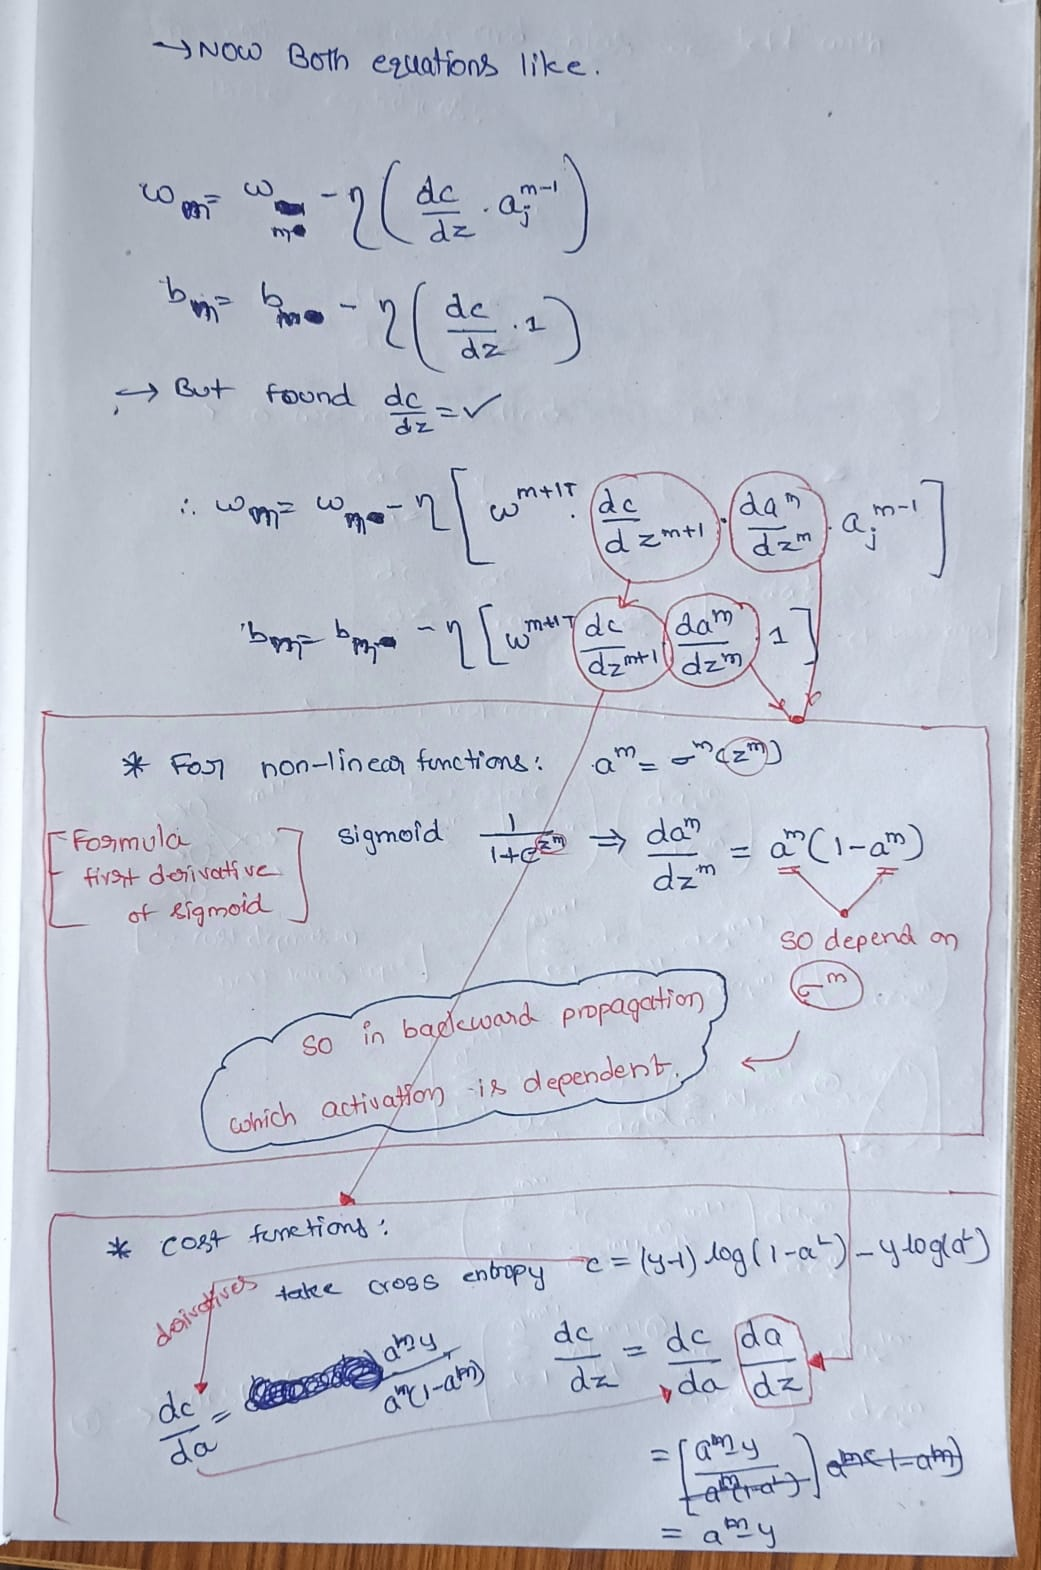

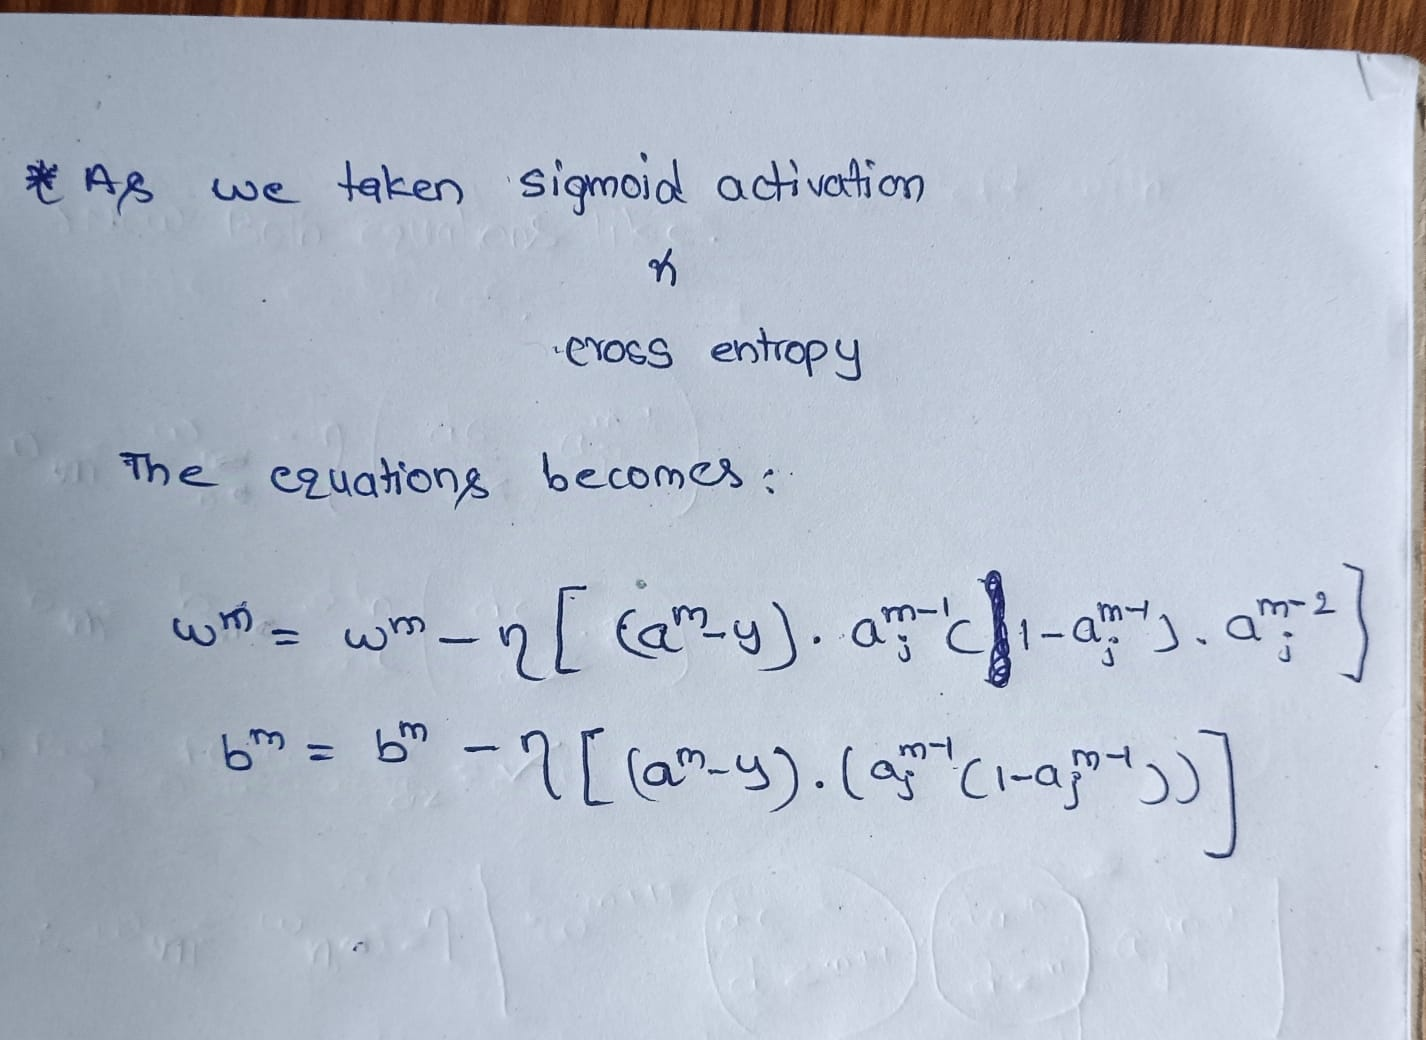

## Backpropagation in practice

As discussed above, the exact form of the updates depends on both the chosen cost function and each layer's chosen nonlinearity.  The following two table lists the some common choices for nonlinearities and the required partial derivative for deriving the gradient for each layer:

| Nonlinearity | $a^m = \sigma^m(z^m)$ | $\frac{\partial a^m}{\partial z^m}$ | Notes |
|--------------|---|---|---|
| Sigmoid      | $\frac{1}{1 + e^{z^m}}$ | $\sigma^m(z^m)(1 - \sigma^m(z^m)) = a^m(1 - a^m)$ | "Squashes" any input to the range $[0, 1]$ |
| Tanh         | $\frac{e^{z^m} - e^{-z^m}}{e^{z^m} + e^{-z^m}}$ | $1 - (\sigma^m(z^m))^2 = 1 - (a^m)^2$ | Equivalent, up to scaling, to the sigmoid function |
| ReLU         | $\max(0, z^m)$ | $0, z^m < 0;\; 1, z^m \ge 0$ | Commonly used in neural networks with many layers|

Similarly, the following table collects some common cost functions and the partial derivative needed to compute the gradient for the final layer:

| Cost Function | $C$                                  | $\frac{\partial C}{\partial a^L}$ | Notes |
|---------------|--------------------------------------|-----------------------------------|---|
| Squared Error | $\frac{1}{2}(y - a^L)^\top(y - a^L)$ | $y - a^L$                         | Commonly used when the output is not constrained to a specific range |
| Cross-Entropy | $(y - 1)\log(1 - a^L) - y\log(a^L)$  | $\frac{a^L - y}{a^L(1 - a^L)}$    | Commonly used for binary classification tasks; can yield faster convergence |

In practice, backpropagation proceeds in the following manner for each training sample:

1. Forward pass: Given the network input $a^0$, compute $a^m$ recursively by
 $$a^1 = \sigma^1(W^1 a^0 + b^1), \ldots, a^L = \sigma^L(W^L a^{L - 1} + b^L)$$
1. Backward pass: Compute 
$$\frac{\partial C}{\partial z^L} = \frac{\partial C}{\partial a^L} \frac{\partial a^L}{\partial z^L}$$
for the final layer based on the tables above, then recursively compute
$$\frac{\partial C}{\partial z^m} = \left(W^{m + 1\top} \frac{\partial C}{\partial z^{m + 1}}\right) \circ \frac{\partial a^m}{\partial z^m}$$
for all other layers.  Plug these values into 
$$\frac{\partial C}{\partial W^m} = \frac{\partial C}{\partial z^m_i} a^{m - 1 \top}$$
and
$$\frac{\partial C}{\partial b^m} = \frac{\partial C}{\partial z^m}$$
to obtain the updates.

---
---

### Example: Sigmoid network with cross-entropy loss using gradient descent

A common network architecture is one with fully connected layers where each layer's nonlinearity is the sigmoid function $a^m = \frac{1}{1 + e^{z^m}}$ and the cost function is the cross-entropy loss $(y - 1)\log(1 - a^L) - y\log(a^L)$.  To compute the updates for gradient descent, we first compute (based on the tables above)
\begin{align*}
\frac{\partial C}{\partial z^L} &= \frac{\partial C}{\partial a^L} \frac{\partial a^L}{\partial z^L}\\
&= \left(\frac{a^L - y}{a^L(1 - a^L)}\right)a^L(1 - a^L)\\
&= a^L - y
\end{align*}
From here, we can compute
\begin{align*}
\frac{\partial C}{\partial z^{L - 1}} &= \left(W^{L\top} \frac{\partial C}{\partial z^L} \right) \circ \frac{\partial a^{L - 1}}{\partial z^{L - 1}}\\
&= W^{L\top} (a^L - y) \circ a^{L - 1}(1 - a^{L - 1})\\
\frac{\partial C}{\partial z^{L - 2}} &= \left(W^{L - 1\top} \frac{\partial C}{\partial z^{L - 1}} \right) \circ \frac{\partial a^{L - 2}}{\partial z^{L - 2}}\\
&= W^{L - 1\top} \left(W^{L\top} (a^L - y) \circ a^{L - 1}(1 - a^{L - 1})\right) \circ a^{L - 2}(1 - a^{L - 2})
\end{align*}
and so on, until we have computed $\frac{\partial C}{\partial z^m}$ for $m \in \{1, \ldots, L\}$.  This allows us to compute  $\frac{\partial C}{\partial W^m_{ij}}$ and $\frac{\partial C}{\partial b^m_i}$, e.g.
\begin{align*}
\frac{\partial C}{\partial W^L} &= \frac{\partial C}{\partial z^L} a^{L - 1 \top}\\
&= (a^L - y)a^{L - 1\top}\\
\frac{\partial C}{\partial W^{L - 1}} &= \frac{\partial C}{\partial z^{L - 1}} a^{L - 2 \top}\\
&= W^{L\top} (a^L - y) \circ a^{L - 1}(1 - a^{L - 1}) a^{L - 2\top}
\end{align*}
and so on.  Standard gradient descent then updates each parameter as follows:
$$W^m = W^m - \lambda \frac{\partial C}{\partial W^m}$$
$$b^m = b^m - \lambda \frac{\partial C}{\partial b^m}$$
where $\lambda$ is the learning rate.  This process is repeated until some stopping criteria is met.

## Toy Python example

Due to the recursive nature of the backpropagation algorithm, it lends itself well to software implementations.  The following code implements a multi-layer perceptron which is trained using backpropagation with user-supplied nonlinearities, layer sizes, and cost function.

In [23]:
# Ensure python 3 forward compatibility
from __future__ import print_function
import numpy as np

def sigmoid(x):
    return 1/(1 + np.exp(-x))

class SigmoidLayer:
    def __init__(self, n_input, n_output):
        self.W = np.random.randn(n_output, n_input)
        self.b = np.random.randn(n_output, 1)
    def output(self, X):
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        return sigmoid(self.W.dot(X) + self.b)

class SigmoidNetwork:

    def __init__(self, layer_sizes):
        '''
        :parameters:
            - layer_sizes : list of int
                List of layer sizes of length L+1 (including the input dimensionality)
        '''
        self.layers = []
        for n_input, n_output in zip(layer_sizes[:-1], layer_sizes[1:]):
            self.layers.append(SigmoidLayer(n_input, n_output))
    
    def train(self, X, y, learning_rate=0.2):
        X = np.array(X)
        y = np.array(y)
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        if y.ndim == 1:
            y = y.reshape(1, -1)
        
        # Forward pass - compute a^n for n in {0, ... L}
        layer_outputs = [X]
        for layer in self.layers:
            layer_outputs.append(layer.output(layer_outputs[-1]))
        
        # Backward pass - compute \partial C/\partial z^m for m in {L, ..., 1}
        cost_partials = [layer_outputs[-1] - y]
        for layer, layer_output in zip(reversed(self.layers), reversed(layer_outputs[:-1])):
            cost_partials.append(layer.W.T.dot(cost_partials[-1])*layer_output*(1 - layer_output))
        cost_partials.reverse()
        
        # Compute weight gradient step
        W_updates = []
        for cost_partial, layer_output in zip(cost_partials[1:], layer_outputs[:-1]):
            W_updates.append(cost_partial.dot(layer_output.T)/X.shape[1])
        # and biases
        b_updates = [cost_partial.mean(axis=1).reshape(-1, 1) for cost_partial in cost_partials[1:]]
        
        for W_update, b_update, layer in zip(W_updates, b_updates, self.layers):
            layer.W -= W_update*learning_rate
            layer.b -= b_update*learning_rate

    def output(self, X):
        a = np.array(X)
        if a.ndim == 1:
            a = a.reshape(-1, 1)
        for layer in self.layers:
            a = layer.output(a)
        return a

In [24]:
nn = SigmoidNetwork([2, 2, 1])
X = np.array([[0, 1, 0, 1], 
              [0, 0, 1, 1]])
y = np.array([0, 1, 1, 0])
for n in range(int(1e3)):
    nn.train(X, y, learning_rate=1.)
print("Input\tOutput\tQuantized")
for i in [[0, 0], [1, 0], [0, 1], [1, 1]]:
    print("{}\t{:.4f}\t{}".format(i, nn.output(i)[0, 0], 1*(nn.output(i)[0] > .5)))

Input	Output	Quantized
[0, 0]	0.5125	[1]
[1, 0]	0.4927	[0]
[0, 1]	0.9788	[1]
[1, 1]	0.0161	[0]


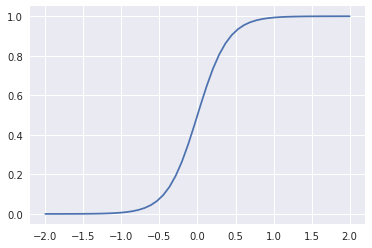

In [25]:
logistic = lambda h, beta: 1./(1 + np.exp(-beta * h))

@interact(beta=(-1, 25))
def logistic_plot(beta=5):
    hvals = np.linspace(-2, 2)
    plt.plot(hvals, logistic(hvals, beta))

This has the advantage of having a simple derivative:

$$\frac{dg}{dh} = \beta g(h)(1 - g(h))$$

Alternatively, the hyperbolic tangent function is also sigmoid:

$$g(h) = \tanh(h) = \frac{\exp(h) - \exp(-h)}{\exp(h) + \exp(-h)}$$

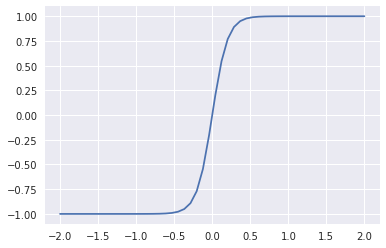

In [26]:
hyperbolic_tangent = lambda h: (np.exp(h) - np.exp(-h)) / (np.exp(h) + np.exp(-h))

@interact(theta=(-1, 25))
def tanh_plot(theta=5):
    hvals = np.linspace(-2, 2)
    h = hvals*theta
    plt.plot(hvals, hyperbolic_tangent(h))

Gradient Descent
---
The simplest algorithm for iterative minimization of differentiable functions is known as just **gradient descent**.
Recall that the gradient of a function is defined as the vector of partial derivatives:

$$\nabla f(x) =  [{\partial{f}{x_1}, \partial{f}{x_2}, \ldots, \partial{f}{x_n}}]$$

and that the gradient of a function always points towards the direction of maximal increase at that point.

Equivalently, it points *away* from the direction of maximum decrease - thus, if we start at any point, and keep moving in the direction of the negative gradient, we will eventually reach a local minimum.

This simple insight leads to the Gradient Descent algorithm. Outlined algorithmically, it looks like this:

1. Pick a point $x_0$ as your initial guess.
2. Compute the gradient at your current guess:
$v_i = \nabla f(x_i)$
3. Move by $\alpha$ (your step size) in the direction of that gradient:
$x_{i+1} = x_i + \alpha v_i$
4. Repeat steps 1-3 until your function is close enough to zero (until $f(x_i) < \varepsilon$ for some small tolerance $\varepsilon$)

Note that the step size, $\alpha$, is simply a parameter of the algorithm and has to be fixed in advance. 

![gd](http://ludovicarnold.altervista.org/wp-content/uploads/2015/01/gradient-trajectory.png)

Notice that the hyperbolic tangent function asymptotes at -1 and 1, rather than 0 and 1, which is sometimes beneficial, and its derivative is simple:

$$\frac{d \tanh(x)}{dx} = 1 - \tanh^2(x)$$

Performing gradient descent will allow us to change the weights in the direction that optimially reduces the error. The next trick will be to employ the **chain rule** to decompose how the error changes as a function of the input weights into the change in error as a function of changes in the inputs to the weights, mutliplied by the changes in input values as a function of changes in the weights. 

$$\frac{\partial E}{\partial w} = \frac{\partial E}{\partial h}\frac{\partial h}{\partial w}$$

This will allow us to write a function describing the activations of the output weights as a function of the activations of the hidden layer nodes and the output weights, which will allow us to propagate error backwards through the network.

The second term in the chain rule simplifies to:

$$\begin{align}
\frac{\partial h_k}{\partial w_{jk}} &= \frac{\partial \sum_l w_{lk} a_l}{\partial w_{jk}}  \\
&= \sum_l \frac{\partial w_{lk} a_l}{\partial w_{jk}} \\
& = a_j
\end{align}$$

where $a_j$ is the activation of the jth hidden layer neuron.

For the first term in the chain rule above, we decompose it as well:

$$\frac{\partial E}{\partial h_k} = \frac{\partial E}{\partial y_k}\frac{\partial y_k}{\partial h_k} = \frac{\partial E}{\partial g(h_k)}\frac{\partial g(h_k)}{\partial h_k}$$

The second term of this chain rule is just the derivative of the activation function, which we have chosen to have a conveneint form, while the first term simplifies to:

$$\frac{\partial E}{\partial g(h_k)} = \frac{\partial}{\partial g(h_k)}\left[\frac{1}{2} \sum_k (t_k - y_k)^2 \right] = t_k - y_k$$

Combining these, and assuming (for illustration) a logistic activiation function, we have the gradient:

$$\frac{\partial E}{\partial w} = (t_k - y_k) y_k (1-y_k) a_j$$

Which ends up getting plugged into the weight update formula that we saw in the single-layer perceptron:

$$w_{jk} \leftarrow w_{jk} - \eta (t_k - y_k) y_k (1-y_k) a_j$$

Note that here we are *subtracting* the second term, rather than adding, since we are doing gradient descent.

We can now outline the MLP learning algorithm:

1. Initialize all $w_{jk}$ to small random values
2. For each input vector, conduct forward propagation:
    * compute activation of each neuron $j$ in hidden layer (here, sigmoid):
    $$h_j = \sum_i x_i v_{ij}$$
    $$a_j = g(h_j) = \frac{1}{1 + \exp(-\beta h_j)}$$
    * when the output layer is reached, calculate outputs similarly:
    $$h_k = \sum_k a_j w_{jk}$$
    $$y_k = g(h_k) = \frac{1}{1 + \exp(-\beta h_k)}$$
3. Calculate loss for resulting predictions:
    * compute error at output:
    $$\delta_k = (t_k - y_k) y_k (1-y_k)$$
4. Conduct backpropagation to get partial derivatives of cost with respect to weights, and use these to update weights:
    * compute error of the hidden layers:
    $$\delta_{hj} = \left[\sum_k w_{jk} \delta_k \right] a_j(1-a_j)$$
    * update output layer weights:
    $$w_{jk} \leftarrow w_{jk} - \eta \delta_k a_j$$
    * update hidden layer weights:
    $$v_{ij} \leftarrow v_{ij} - \eta \delta_{hj} x_i$$
    
Return to (2) and iterate until learning completes. Best practice is to shuffle input vectors to avoid training in the same order.

Its important to be aware that because gradient descent is a hill-climbing (or descending) algorithm, it is liable to be caught in local minima with respect to starting values. Therefore, it is worthwhile training several networks using a range of starting values for the weights, so that you have a better chance of discovering a globally-competitive solution.

One useful performance enhancement for the MLP learning algorithm is the addition of **momentum** to the weight updates. This is just a coefficient on the previous weight update that increases the correlation between the current weight and the weight after the next update. This is particularly useful for complex models, where falling into local mimima is an issue; adding momentum will give some weight to the previous direction, making the resulting weights essentially a weighted average of the two directions. Adding momentum, along with a smaller learning rate, usually results in a more stable algorithm with quicker convergence. When we use momentum, we lose this guarantee, but this is generally seen as a small price to pay for the improvement momentum usually gives.

A weight update with momentum looks like this:

$$w_{jk} \leftarrow w_{jk} - \eta \delta_k a_j + \alpha \Delta w_{jk}^{t-1}$$

where $\alpha$ is the momentum (regularization) parameter and $\Delta w_{jk}^{t-1}$ the update from the previous iteration.

The multi-layer pereptron is implemented below in the `MLP` class. The implementation uses the scikit-learn interface, so it is uses in the same way as other supervised learning algorithms in that package.